#**Machine Learning Study Case - Human Development Index (HDI) Classification**
**In Indonesian: Indeks Pembangunan Manusia (IPM)**

The Human Development Index (HDI) is an index that explains how the population can access the results of development in obtaining income, health, education, and so on. HDI is an important indicator to measure success in efforts to build the quality of human life (community/population) and can determine the rank or level of development of a region/country.

This project aims to see the HDI level in the data categorized as Low, Normal, High, and Very High using classification method so that data exploration can be done and predict the HDI level in the testing data. In addition, this project will compare three models, namely Random Forest, Gradient Boost, and XGboost to see the results and accuracy of the three models.

**Written by Giselle Halim**

**Tensor Class**

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
df = pd.read_csv('IPM.csv')
X = df.drop(['IPM'], axis=1)
y = df['IPM']
print(df)

      Harapan_Lama_Sekolah  Pengeluaran_Perkapita  Rerata_Lama_Sekolah  \
0                    14.36                   9572                 9.37   
1                    13.90                   7148                 9.48   
2                    14.32                   8776                 8.68   
3                    14.60                   8180                 8.88   
4                    14.01                   8030                 9.67   
...                    ...                    ...                  ...   
2191                 10.13                   5522                 4.91   
2192                  7.11                   5440                 2.51   
2193                  9.79                   4761                 2.99   
2194                 14.99                  14922                11.30   
2195                 12.91                  11059                 8.17   

      Usia_Harapan_Hidup     IPM  
0                  69.96    High  
1                  65.28  Normal  
2     

The data used is data on the Human Development Index. This data consists of 2196 rows of data.

The dependent variable (y) in the data is the HDI level which is divided into 4 categories as follows:

* Low
* Normal (medium)
* High
* Very High

The independent variables (x) in the data consist of:

* Expected years of schooling
* Expenditure per capita
* Average years of schooling
* Life expectancy

In [ ]:
df['IPM'] = df['IPM'].astype('category')

Convert HDI variable to category data type.

In [ ]:
df.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [ ]:
df.tail()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High
2195,12.91,11059,8.17,71.20,High


In [ ]:
#General dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Harapan_Lama_Sekolah   2196 non-null   float64 
 1   Pengeluaran_Perkapita  2196 non-null   int64   
 2   Rerata_Lama_Sekolah    2196 non-null   float64 
 3   Usia_Harapan_Hidup     2196 non-null   float64 
 4   IPM                    2196 non-null   category
dtypes: category(1), float64(3), int64(1)
memory usage: 71.1 KB


In [ ]:
#Checking for duplicated data
df.duplicated().sum()

0

In [ ]:
#Check the data for null values
df.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

##Exploratory Data Analysis (EDA)

In [ ]:
#Minimum/Maximum Harapan Lama Sekolah
min_harapan_sekolah = min(df['Harapan_Lama_Sekolah'])
max_harapan_sekolah = max(df['Harapan_Lama_Sekolah'])

print("Harapan Lama Sekolah Tersingkat: ",min_harapan_sekolah)
print("Harapan Lama Sekolah Terpanjang: ",max_harapan_sekolah)

Harapan Lama Sekolah Tersingkat:  2.95
Harapan Lama Sekolah Terpanjang:  17.8


In [ ]:
#Minimum/Maximum Pengeluaran Perkapita
min_pengeluaran = min(df['Pengeluaran_Perkapita'])
max_pengeluaran = max(df['Pengeluaran_Perkapita'])

print("Pengeluaran Terkecil: ",min_pengeluaran)
print("Pengeluaran Terbesar: ",max_pengeluaran)

Pengeluaran Terkecil:  3975
Pengeluaran Terbesar:  23888


In [ ]:
#Minimum/Maximum Rerata Lama Sekolah
min_sekolah = min(df['Rerata_Lama_Sekolah'])
max_sekolah = max(df['Rerata_Lama_Sekolah'])

print("Rerata Lama Sekolah Tersingkat: ",min_sekolah)
print("Rerata Lama Sekolah Terpanjang: ",max_sekolah)

Rerata Lama Sekolah Tersingkat:  0.85
Rerata Lama Sekolah Terpanjang:  12.83


In [ ]:
#Minimum/Maximum Usia Harapan Hidup
min_usia_harapan = min(df['Usia_Harapan_Hidup'])
max_usia_harapan = max(df['Usia_Harapan_Hidup'])

print("Usia Harapan Hidup Tersingkat: ",min_usia_harapan)
print("Usia Harapan Hidup Terlama: ",max_usia_harapan)

Usia Harapan Hidup Tersingkat:  54.82
Usia Harapan Hidup Terlama:  77.73


In [ ]:
#Statistical Calculation
df[['Harapan_Lama_Sekolah','Pengeluaran_Perkapita','Rerata_Lama_Sekolah','Usia_Harapan_Hidup']].describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


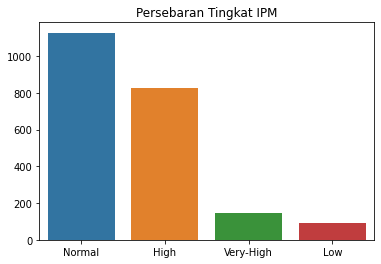

In [ ]:
import seaborn as sns
#Univariate Analysis IPM
data_plot  = df['IPM'].value_counts().to_list()
label_plot = df['IPM'].value_counts().index.to_list()

judul = 'Persebaran Tingkat IPM'

plot       = sns.barplot(x = label_plot, y = data_plot)
plot_title = plt.title(judul)

plt.show()
print()

In [ ]:
df['IPM'].value_counts()

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

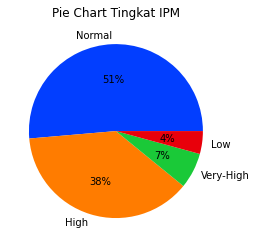

In [ ]:
palet_warna = sns.color_palette('bright')

data_plot  = df['IPM'].value_counts().to_list()
label_plot = df['IPM'].value_counts().index.to_list()

judul = 'Pie Chart Tingkat IPM'

plot       = plt.pie(data_plot, labels=label_plot, colors=palet_warna, autopct='%.0f%%')
plot_title = plt.title(judul)

plt.show()
print()

[Text(0.5, 1.0, ' Penyebaran Harapan Lama Sekolah ')]

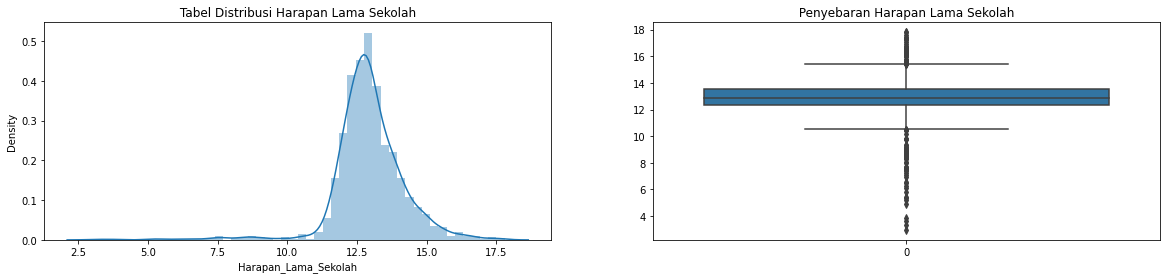

In [ ]:
#Univariate Analysis Harapan Lama Sekolah
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Harapan_Lama_Sekolah']).set (title=' Tabel Distribusi Harapan Lama Sekolah ')

f.add_subplot(1,2,2)
sns.boxplot(df['Harapan_Lama_Sekolah']).set (title=' Penyebaran Harapan Lama Sekolah ')

In [ ]:
#Harapan lama sekolah dibawah 12 tahun
df[df['Harapan_Lama_Sekolah']<12].shape

(288, 5)

In [ ]:
#Harapan lama sekolah diatas 12 tahun atau lebih
df[df['Harapan_Lama_Sekolah']>=12].shape

(1908, 5)

[Text(0.5, 1.0, ' Penyebaran Pengeluaran Per Kapita ')]

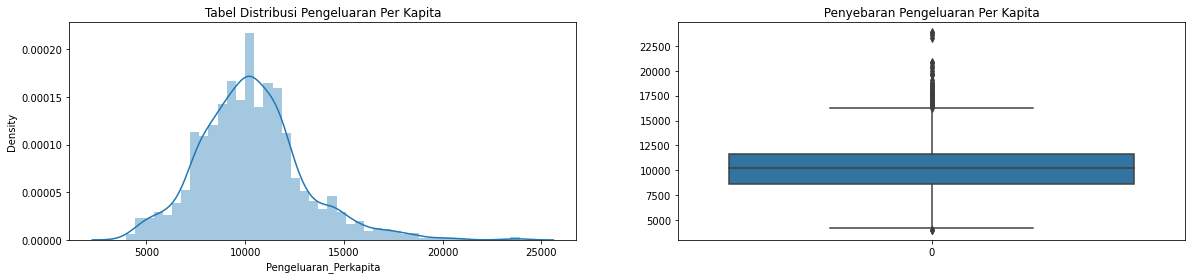

In [ ]:
#Univariate Analysis Pengeluaran Per Kapita
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Pengeluaran_Perkapita']).set (title=' Tabel Distribusi Pengeluaran Per Kapita ')

f.add_subplot(1,2,2)
sns.boxplot(df['Pengeluaran_Perkapita']).set (title=' Penyebaran Pengeluaran Per Kapita ')

[Text(0.5, 1.0, ' Penyebaran Rerata Lama Sekolah ')]

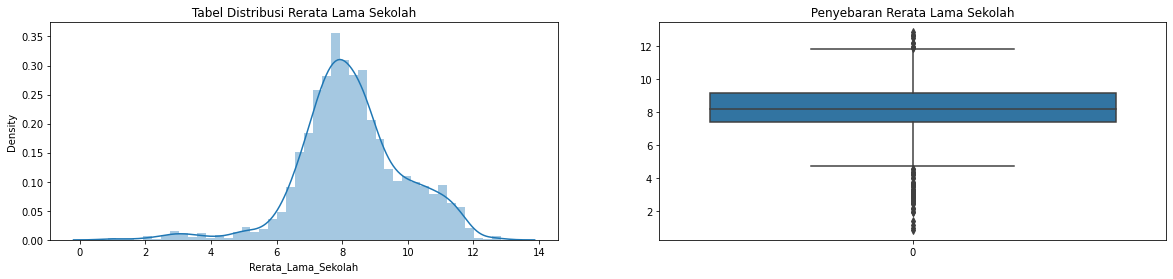

In [ ]:
#Univariate Analysis Rerata Lama Sekolah
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Rerata_Lama_Sekolah']).set (title=' Tabel Distribusi Rerata Lama Sekolah ')

f.add_subplot(1,2,2)
sns.boxplot(df['Rerata_Lama_Sekolah']).set (title=' Penyebaran Rerata Lama Sekolah ')

In [ ]:
#Rerata lama sekolah dibawah 12 tahun
df[df['Rerata_Lama_Sekolah']<12].shape

(2189, 5)

In [ ]:
#Rerata lama sekolah 12 tahun atau lebih
df[df['Rerata_Lama_Sekolah']>=12].shape

(7, 5)

[Text(0.5, 1.0, ' Penyebaran Usia Harapan Hidup ')]

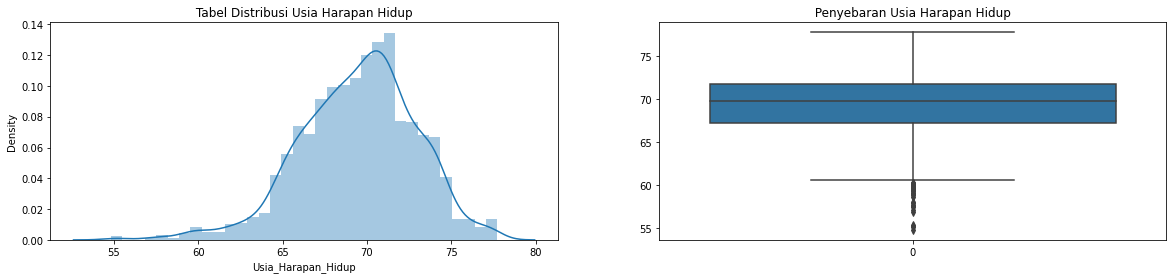

In [ ]:
#Univariate Analysis Usia Harapan Hidup
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['Usia_Harapan_Hidup']).set (title=' Tabel Distribusi Usia Harapan Hidup ')

f.add_subplot(1,2,2)
sns.boxplot(df['Usia_Harapan_Hidup']).set (title=' Penyebaran Usia Harapan Hidup ')

In [ ]:
#Usia harapan hidup dibawah 73.5 tahun (Sumber dari BPS, tahun 2021)
df[df['Usia_Harapan_Hidup']<73.5].shape

(1935, 5)

In [ ]:
#Usia harapan hidup dibawah 73.5 tahun (Sumber dari BPS, tahun 2021)
df[df['Usia_Harapan_Hidup']>73.5].shape

(261, 5)

In [ ]:
#Correlation across features
df.corr().style.background_gradient().set_precision(2)

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
Harapan_Lama_Sekolah,1.00,0.52,0.77,0.38
Pengeluaran_Perkapita,0.52,1.00,0.67,0.56
Rerata_Lama_Sekolah,0.77,0.67,1.00,0.42
Usia_Harapan_Hidup,0.38,0.56,0.42,1.00


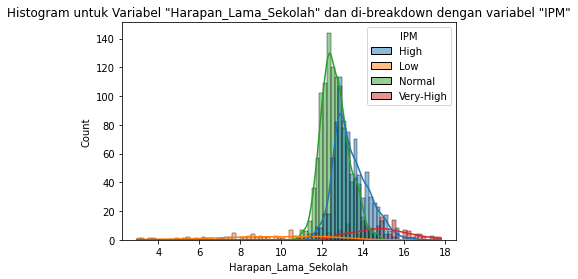

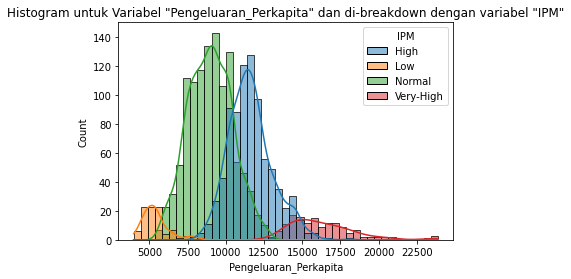

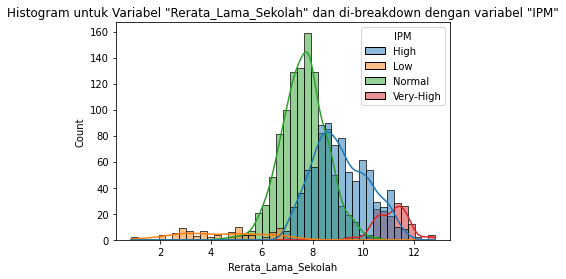

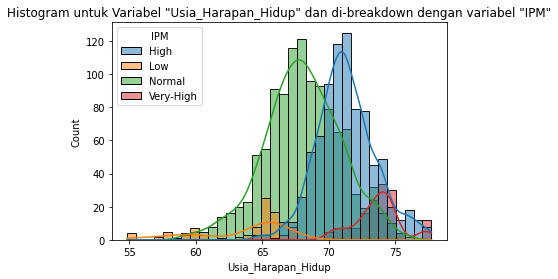

In [ ]:
daftar_nama_kolom = ['Harapan_Lama_Sekolah', 'Pengeluaran_Perkapita',
                     'Rerata_Lama_Sekolah', 'Usia_Harapan_Hidup']

for nama_kolom in daftar_nama_kolom:
  judul = 'Histogram untuk Variabel "' + nama_kolom + '" dan di-breakdown dengan variabel "IPM"'

  plot = sns.histplot(data = df, x = nama_kolom, hue = 'IPM', kde=True)
  plot_title = plt.title(judul)

  plt.show()
  print()

It can be seen that the higher the expected years of schooling, average years of schooling, per capita expenditure and life expectancy, the better the HDI level tends to be.

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((1317, 4), (879, 4))

In [ ]:
print(X_train)

      Harapan_Lama_Sekolah  Pengeluaran_Perkapita  Rerata_Lama_Sekolah  \
720                  12.50                  10845                 8.55   
1067                 11.08                   6954                 6.69   
1844                 13.42                   9855                 9.04   
1645                 15.00                  15176                11.55   
58                   14.09                  10790                 9.07   
...                    ...                    ...                  ...   
1638                  8.35                   4569                 3.19   
1095                  9.81                   4632                 3.01   
1130                 12.59                  10983                 8.49   
1294                 13.79                  12448                10.95   
860                  13.11                   7321                 6.60   

      Usia_Harapan_Hidup  
720                73.04  
1067               65.79  
1844               71.70  
164

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(y_train)

[0 2 0 ... 2 0 2]


Keterangan:

0 = High

1 = Low

2 = Normal

3 = Very High










In [ ]:
print(X_test)

      Harapan_Lama_Sekolah  Pengeluaran_Perkapita  Rerata_Lama_Sekolah  \
427                  12.05                  11829                 6.77   
1769                 13.59                   9592                 9.01   
367                  12.40                   9868                 7.55   
1124                 13.17                   9900                 8.36   
350                  12.85                  11866                 8.15   
...                    ...                    ...                  ...   
551                  14.31                   8707                 8.53   
520                  12.53                   7545                 5.60   
1258                 12.44                  12091                 6.51   
208                  12.57                  13031                 7.85   
1732                 12.82                   9608                 8.37   

      Usia_Harapan_Hidup  
427                70.60  
1769               67.45  
367                66.27  
112

In [ ]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
print(y_test)

[2 2 2 2 0 2 1 0 2 0 2 0 2 0 0 2 2 2 2 2 1 2 2 2 2 2 1 0 0 0 2 2 2 0 2 0 2
 3 2 0 2 0 2 3 2 0 1 0 2 2 3 2 2 0 1 2 0 2 0 3 2 0 2 3 2 2 2 2 0 2 2 2 0 0
 2 1 2 2 2 0 0 3 0 0 2 0 0 2 2 0 0 2 2 0 2 2 0 2 1 2 2 2 2 2 0 0 2 1 2 2 2
 2 0 2 2 0 2 0 2 2 2 0 3 2 0 0 0 2 3 3 0 2 2 0 0 2 2 0 2 2 0 0 2 0 2 2 0 1
 0 0 0 2 0 3 0 3 2 0 2 3 0 0 3 0 2 0 2 2 2 2 2 2 0 2 2 0 2 0 0 0 2 3 2 2 1
 2 2 2 2 1 2 0 0 0 2 2 0 0 2 2 2 2 1 2 0 2 0 0 2 0 0 0 2 3 0 2 3 2 2 2 2 2
 2 2 3 2 0 0 3 2 2 2 0 0 0 0 0 0 0 2 0 2 3 2 2 0 2 0 2 2 0 0 0 0 0 0 3 1 0
 0 2 2 2 3 2 2 0 2 2 2 2 3 3 2 2 0 0 2 0 0 2 2 2 2 0 2 0 3 0 2 2 0 0 0 0 0
 0 2 2 0 0 2 0 1 2 2 2 3 0 0 3 2 0 0 2 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 0 3 0
 2 0 0 2 2 2 2 2 2 2 2 0 2 0 2 0 0 2 0 0 0 2 3 2 0 1 0 2 2 2 2 2 2 0 0 3 2
 1 2 0 2 3 2 0 2 0 0 2 0 2 2 2 2 2 0 0 0 0 0 3 0 0 0 2 2 0 2 0 2 0 2 2 0 0
 0 0 2 0 2 0 2 2 2 2 2 3 2 0 2 2 0 2 2 2 2 2 0 2 2 2 2 3 0 2 2 2 2 2 2 0 3
 1 0 0 2 0 3 2 0 0 2 0 2 2 0 0 2 2 2 0 2 2 0 2 2 0 2 0 0 0 2 0 0 0 2 2 2 2
 0 2 2 2 2 2 0 2 2 0 2 0 

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #avoid data leakage

In [ ]:
print(X_train)

[[-0.30367824  0.21508764  0.18719879  1.06805165]
 [-1.39627491 -1.2614393  -0.97927936 -1.05093025]
 [ 0.40420129 -0.16058999  0.49449679  0.67640534]
 ...
 [-0.23442916  0.26745482  0.14957046 -0.37285604]
 [ 0.68889198  0.82338183  1.69233187  1.31648401]
 [ 0.16567667 -1.12217294 -1.03572185 -0.67389761]]


In [ ]:
print(X_test.dtype)

float64


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=35, criterion="entropy")
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))
print('Test-set accuracy score:', classifier_rf.score(X_test, y_test))

[[324   0   6  10]
 [  0  36   1   0]
 [  9   0 431   0]
 [  0   0   0  62]]
Training-set accuracy score: 1.0
Test-set accuracy score: 0.9704209328782708


In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       340
           1       1.00      0.97      0.99        37
           2       0.98      0.98      0.98       440
           3       0.86      1.00      0.93        62

    accuracy                           0.97       879
   macro avg       0.95      0.98      0.96       879
weighted avg       0.97      0.97      0.97       879



In [ ]:
#Class proportion
y_train.sum()/1317

1.278663629460896

## Balancing Data

In [ ]:
from imblearn.over_sampling import SMOTE
#Define oversampling strategy
SMOTE = SMOTE()

#Fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [ ]:
#Random Forest
classifier_rf2 = RandomForestClassifier(n_estimators=35,criterion="entropy")
classifier_rf2.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(criterion='entropy', n_estimators=35)

In [ ]:
#Class proportion after SMOTE
y_train_SMOTE.sum()/1317

3.134396355353075

In [ ]:
y_pred_rf = classifier_rf2.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[325,   0,   6,   9],
       [  0,  36,   1,   0],
       [  9,   1, 430,   0],
       [  0,   0,   0,  62]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       340
           1       0.97      0.97      0.97        37
           2       0.98      0.98      0.98       440
           3       0.87      1.00      0.93        62

    accuracy                           0.97       879
   macro avg       0.95      0.98      0.96       879
weighted avg       0.97      0.97      0.97       879



In [ ]:
print('Training-set accuracy score:', classifier_rf2.score(X_train_SMOTE, y_train_SMOTE))
print('Testing-set accuracy score:', classifier_rf2.score(X_test, y_test))

Training-set accuracy score: 0.9996366279069767
Testing-set accuracy score: 0.9704209328782708


In [ ]:
from sklearn import tree
plt.figure(figsize=(200,200))
_= tree.plot_tree(classifier_rf.estimators_[0], feature_names=X.columns, filled=True)

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier(n_estimators=35)
classifier_gb.fit(X_train, y_train)
y_pred_gb = classifier_gb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_gb)
print(cm)
print('Training-set accuracy score:', classifier_gb.score(X_train, y_train))
print('Test-set accuracy score:', classifier_gb.score(X_test, y_test))

[[312   0  15  13]
 [  0  35   2   0]
 [  9   0 431   0]
 [  0   0   0  62]]
Training-set accuracy score: 0.996962794229309
Test-set accuracy score: 0.9556313993174061


In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       340
           1       1.00      0.95      0.97        37
           2       0.96      0.98      0.97       440
           3       0.83      1.00      0.91        62

    accuracy                           0.96       879
   macro avg       0.94      0.96      0.95       879
weighted avg       0.96      0.96      0.96       879



In [ ]:
#SMOTE
classifier_gb = GradientBoostingClassifier(n_estimators=35)
classifier_gb.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_gb = classifier_gb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_gb)
print(cm)
print('Training-set accuracy score:', classifier_gb.score(X_train_SMOTE, y_train_SMOTE))
print('Test-set accuracy score:', classifier_gb.score(X_test, y_test))

[[315   0  12  13]
 [  0  36   1   0]
 [ 13   2 425   0]
 [  0   0   0  62]]
Training-set accuracy score: 0.9974563953488372
Test-set accuracy score: 0.9533560864618885


In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       340
           1       0.95      0.97      0.96        37
           2       0.97      0.97      0.97       440
           3       0.83      1.00      0.91        62

    accuracy                           0.95       879
   macro avg       0.93      0.97      0.94       879
weighted avg       0.96      0.95      0.95       879



## XGBoost

In [ ]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(n_estimators=35)
classifier_xgb.fit(X_train, y_train)
y_pred_xgb = classifier_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)
print('Training-set accuracy score:', classifier_xgb.score(X_train, y_train))
print('Test-set accuracy score:', classifier_xgb.score(X_test, y_test))

[[321   0   6  13]
 [  0  37   0   0]
 [  8   0 432   0]
 [  0   0   0  62]]
Training-set accuracy score: 1.0
Test-set accuracy score: 0.9692832764505119


In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       340
           1       1.00      1.00      1.00        37
           2       0.99      0.98      0.98       440
           3       0.83      1.00      0.91        62

    accuracy                           0.97       879
   macro avg       0.95      0.98      0.96       879
weighted avg       0.97      0.97      0.97       879



In [ ]:
#SMOTE
classifier_xgb = XGBClassifier(n_estimators=35)
classifier_xgb.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_xgb = classifier_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)
print('Training-set accuracy score:', classifier_xgb.score(X_train_SMOTE, y_train_SMOTE))
print('Test-set accuracy score:', classifier_xgb.score(X_test, y_test))

[[319   0   7  14]
 [  0  36   1   0]
 [ 10   1 429   0]
 [  0   0   0  62]]
Training-set accuracy score: 1.0
Test-set accuracy score: 0.962457337883959


In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       340
           1       0.97      0.97      0.97        37
           2       0.98      0.97      0.98       440
           3       0.82      1.00      0.90        62

    accuracy                           0.96       879
   macro avg       0.94      0.97      0.95       879
weighted avg       0.96      0.96      0.96       879



Based on the classification report and accuracy during testing (after balancing the data), the Random Forest and XGBoost models are the best models with almost the same accuracy, then slightly below is Gradient Boosting.
But actually the accuracy value of the three models does not differ much between the best model and the third best.

In addition, it can also be seen that data balancing does not have much effect on model accuracy in this case.

## Test Set Results

In [ ]:
print('Random Forest Predictions: \n',y_pred_rf)

Random Forest Predictions: 
 [2 0 2 2 0 2 1 0 0 0 2 0 2 0 0 2 2 2 2 2 1 2 2 2 2 2 1 0 0 0 2 2 2 0 2 0 2
 3 2 0 2 0 2 3 2 0 1 0 2 2 3 2 2 0 1 2 0 2 0 3 2 0 2 3 2 2 2 2 0 2 2 2 0 0
 2 1 2 2 2 0 0 3 0 0 2 0 0 2 2 0 0 2 2 0 2 2 0 2 1 2 2 2 2 2 0 0 2 1 2 2 2
 2 0 2 2 0 2 0 2 2 2 0 3 2 0 0 0 2 3 3 0 2 2 0 3 2 2 0 2 2 0 0 2 0 2 2 0 1
 0 0 0 2 0 3 0 3 2 0 2 3 0 0 3 0 2 0 2 2 2 2 2 2 0 2 2 0 2 0 0 0 2 3 2 2 1
 2 2 2 2 1 2 0 0 0 2 2 0 0 2 2 2 2 2 2 0 2 0 0 2 0 0 0 2 3 0 2 3 2 2 2 2 2
 2 2 3 2 0 0 3 2 2 2 0 0 0 0 0 0 0 2 0 2 3 2 2 3 2 0 2 2 0 0 0 0 0 0 3 1 0
 0 2 2 2 3 2 2 0 2 2 2 2 3 3 2 2 0 0 2 0 0 2 2 2 2 0 2 0 3 0 2 0 0 0 0 0 0
 0 2 2 0 0 2 0 1 2 2 2 3 0 0 3 2 0 0 2 0 0 2 2 2 2 0 2 2 0 2 2 2 2 0 0 3 0
 2 0 0 2 2 1 2 2 2 2 2 0 2 0 2 0 0 2 0 0 0 2 3 2 0 1 0 2 2 2 2 2 2 0 0 3 2
 1 2 0 2 3 2 0 2 0 0 2 0 2 2 2 2 2 0 0 0 0 0 3 0 0 0 2 2 3 2 0 2 0 0 2 0 0
 3 0 2 0 2 0 2 2 2 2 2 3 2 0 2 2 0 2 2 2 2 2 0 2 2 2 2 3 0 2 2 2 2 2 2 0 3
 1 0 0 2 0 3 2 0 0 2 0 2 2 0 0 2 2 2 0 2 2 0 2 2 0 2 0 0 3 2 0 0 0 2 2 

In [ ]:
print('Gradient Boosting Predictions: \n',y_pred_gb)

Gradient Boosting Predictions: 
 [2 0 2 2 0 2 1 0 0 0 2 0 2 0 0 2 2 2 2 2 1 2 2 2 2 2 1 0 0 0 2 2 2 0 2 0 2
 3 2 0 2 0 2 3 2 0 1 0 2 2 3 2 2 0 1 2 0 2 0 3 0 0 2 3 2 2 2 2 0 2 2 2 0 0
 2 1 2 2 2 0 0 3 0 0 2 0 0 2 2 0 0 2 2 0 2 2 0 2 1 2 2 2 2 2 0 0 2 1 2 2 2
 2 0 2 2 0 2 0 2 2 2 0 3 2 0 0 0 2 3 3 0 2 2 0 3 2 2 0 2 2 0 0 2 0 2 2 0 1
 0 0 0 2 0 3 0 3 2 0 2 3 0 0 3 0 2 0 2 2 2 2 2 2 0 2 2 0 2 0 0 0 2 3 2 2 1
 2 2 2 2 1 2 0 0 0 2 2 0 0 2 2 2 2 2 2 0 2 0 0 2 0 0 0 2 3 0 2 3 2 2 2 2 2
 2 2 3 2 0 0 3 2 0 2 0 0 0 0 0 0 0 2 0 2 3 2 2 3 2 0 2 2 0 0 0 0 0 0 3 1 0
 3 2 2 0 3 2 2 0 2 2 2 2 3 3 2 2 0 0 2 0 0 2 2 2 2 0 2 0 3 0 2 0 0 0 0 0 0
 2 2 2 0 0 2 0 1 2 2 2 3 0 0 3 2 0 0 2 0 0 1 2 2 2 0 2 2 0 2 2 2 2 0 0 3 0
 2 0 2 0 2 1 2 2 2 2 2 0 2 0 2 0 0 2 0 0 0 2 3 2 0 1 0 2 2 2 2 2 2 0 0 3 2
 1 2 2 2 3 2 2 2 0 0 2 0 2 2 2 2 2 0 0 0 0 0 3 0 0 0 2 2 3 2 2 2 0 0 2 0 0
 3 0 2 0 2 0 2 2 2 2 2 3 2 0 2 2 0 2 2 2 2 2 3 2 2 2 2 3 0 2 2 2 2 2 2 0 3
 1 0 0 2 0 3 2 0 0 2 0 2 2 0 0 2 2 2 0 2 2 0 2 2 0 2 0 0 3 2 0 0 0 

In [ ]:
print('XGBoosting Predictions: \n',y_pred_xgb)

XGBoosting Predictions: 
 [2 0 2 2 0 2 1 0 0 0 2 0 2 0 0 2 2 2 2 2 1 2 2 2 2 2 1 0 0 0 2 2 2 0 2 0 2
 3 2 0 2 0 2 3 2 0 1 0 2 2 3 2 2 0 1 2 0 2 0 3 0 0 2 3 2 2 2 2 0 2 2 2 0 0
 2 1 2 2 2 0 0 3 0 0 2 0 0 2 2 0 0 2 2 0 2 2 0 2 1 2 2 2 2 2 0 0 2 1 2 2 2
 2 0 2 2 0 2 0 2 2 2 0 3 2 0 0 0 2 3 3 0 2 2 0 3 2 2 0 2 2 0 0 2 0 2 2 0 1
 0 0 0 2 0 3 0 3 2 0 2 3 0 0 3 0 2 0 2 2 2 2 2 2 0 2 2 0 2 0 0 3 2 3 2 2 1
 2 2 2 2 1 2 0 0 0 2 2 0 0 2 2 2 2 2 2 0 2 0 0 2 0 0 0 2 3 0 2 3 2 2 2 2 2
 2 2 3 2 0 0 3 2 0 2 0 0 0 0 0 0 0 2 0 2 3 2 2 3 2 0 2 2 0 0 0 0 0 0 3 1 0
 3 2 2 2 3 2 2 0 2 2 2 2 3 3 2 2 0 0 2 0 0 2 2 2 2 0 2 0 3 0 2 0 0 0 0 0 0
 0 2 2 0 0 2 0 1 2 2 2 3 0 0 3 2 0 0 2 0 0 2 2 2 2 0 2 2 0 2 2 2 2 0 0 3 0
 2 0 0 2 2 1 2 2 2 2 2 0 2 0 2 0 0 2 0 0 0 2 3 2 0 1 0 2 2 2 2 2 2 0 0 3 2
 1 2 0 2 3 2 0 2 0 0 2 0 2 2 2 2 2 0 0 0 0 0 3 0 0 0 2 2 3 2 2 2 0 0 2 0 2
 3 0 2 0 2 0 2 2 2 2 2 3 2 0 2 2 0 2 2 2 2 2 0 2 2 2 2 3 0 2 2 2 2 2 2 0 3
 1 0 3 2 0 3 2 0 0 2 0 2 2 0 0 2 2 2 0 2 2 0 2 2 0 2 0 0 3 2 0 0 0 2 2 2 2